In [2]:
from transformers import BertTokenizer, GPT2Tokenizer

example = "I like to learn and practice LLMs using Huggingface!"

wp_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased') # WordPiece tokenizer
wp_tokens = wp_tokenizer(example)

bpe_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
bpe_tokens = bpe_tokenizer(example)
print(f"WordPiece Tokens: {wp_tokens}\n BPE Tokens: {bpe_tokens}")

/Users/akhra92/miniconda3/envs/my_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


WordPiece Tokens: {'input_ids': [101, 1045, 2066, 2000, 4553, 1998, 3218, 2222, 5244, 2478, 17662, 12172, 999, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
 BPE Tokens: {'input_ids': [40, 588, 284, 2193, 290, 3357, 27140, 10128, 1262, 12905, 2667, 2550, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [3]:
from datasets import load_dataset

class IMDBDataset:

    def __init__(self, dataset_name = 'imdb'):
        self.dataset_name = dataset_name
        self.dataset = None
    def load(self):
        self.dataset = load_dataset(self.dataset_name)

        return self.dataset

In [4]:
ds = IMDBDataset().load()

In [5]:
ds.keys()

dict_keys(['train', 'test', 'unsupervised'])

In [6]:
print(f"Train Samples: {len(ds['train'])}")
print(f"Test Samples: {len(ds['test'])}")

Train Samples: 25000
Test Samples: 25000


In [7]:
print("First 3 samples")
for i in range(3):
    sample = ds['train'][i]
    print(f"\nSample {i+1}:")
    print(f"Label: {sample['label']} ({'Positive' if sample['label'] == 1 else 'Negative'})")
    print(f"Text: {sample['text'][:200]}...")

First 3 samples

Sample 1:
Label: 0 (Negative)
Text: I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ev...

Sample 2:
Label: 0 (Negative)
Text: "I Am Curious: Yellow" is a risible and pretentious steaming pile. It doesn't matter what one's political views are because this film can hardly be taken seriously on any level. As for the claim that ...

Sample 3:
Label: 0 (Negative)
Text: If only to avoid making this type of film in the future. This film is interesting as an experiment but tells no cogent story.<br /><br />One might feel virtuous for sitting thru it because it touches ...


In [8]:
import matplotlib.pyplot as plt
from collections import Counter

labels = ds['train']['label']
label_counts = Counter(labels)

print("Label distribution:")
print(f"Negative (0): {label_counts[0]}")
print(f"Positive (1): {label_counts[1]}")

Label distribution:
Negative (0): 12500
Positive (1): 12500


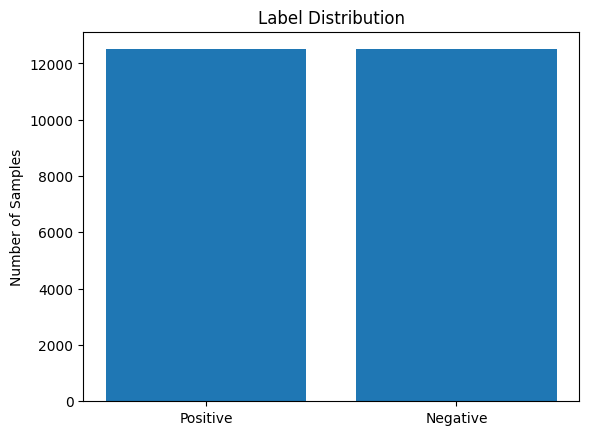

In [9]:
plt.bar(["Positive", "Negative"], [label_counts[1], label_counts[0]])
plt.title("Label Distribution")
plt.ylabel("Number of Samples")
plt.show()

In [10]:
import numpy as np

text_length = [len(text.split()) for text in ds["train"]["text"]]
print(f"Average review length: {np.mean(text_length)}")
print(f"Max review length: {np.max(text_length)}")
print(f"Min review length: {np.min(text_length)}")

Average review length: 233.7872
Max review length: 2470
Min review length: 10


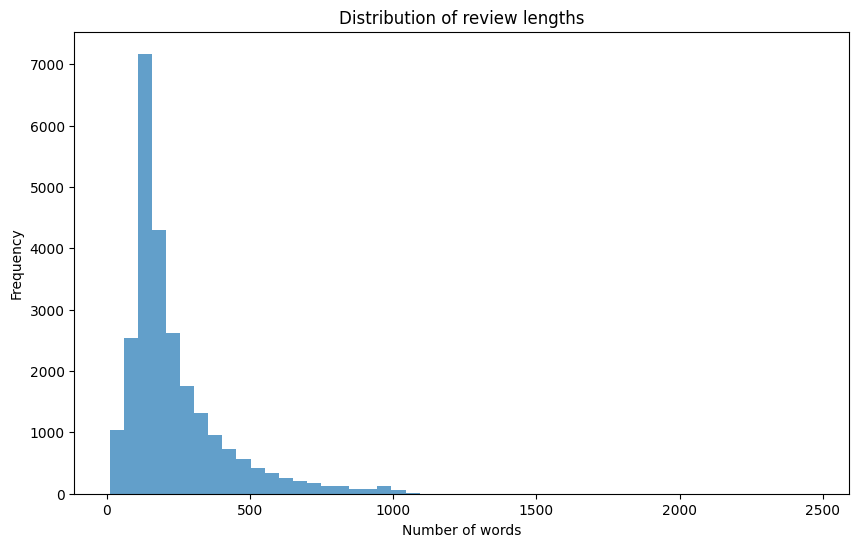

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(text_length, bins=50, alpha=0.7)
plt.title("Distribution of review lengths")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()

In [12]:
train_df = ds['train'].to_pandas()
train_df['sentiment_label'] = train_df['label'].map({0: 'Negative', 1: 'Positive'})
train_df.groupby('sentiment_label').size()

sentiment_label
Negative    12500
Positive    12500
dtype: int64

In [13]:
import random
random.seed(42)

pos = random.sample(range(0, 12500), 5)
neg = random.sample(range(12500, 25000), 5)

for i in range(5):
    print(f"Positive Sample {i+1}: {ds['train'][pos[i]]['text']}")
    print(f"Negative Sample {i+1}: {ds['train'][neg[i]]['text']}")


Positive Sample 1: Giant crabs cursing in Japanese? What was in that drink? A terrible movie, but laughable. I love the invisible Samurai ghosties running around. Drink much beer before you see this movie.
Negative Sample 1: Eric Rohmer's "The Lady and the Duke". could have used a better translation for the title. "The English Woman and the Duke", perhaps, would have been more accurate. While it's obvious this film is not for everyone, judging by the comments to this forum, it is worth watching because in spite of the intricate pattern of the story, Mr. Rohmer has created a movie that could be seen as an art exhibit in a museum. The mixed technology used in the movie, ultimately, works well.<br /><br />The strange story of Grace Elliott, a noble lady who had been the mistress of the king of England and of the French Duc d'Orleans, holds our attention. The setting is Paris during the days that followed the French Revolution. The country was in turmoil and the power was in the hands of t

In [14]:
pos_text = [[ds['train'][idx]['text']] for idx in pos]
neg_text = [[ds['train'][idx]['text']] for idx in neg]


In [15]:
pretraied_model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(pretraied_model_name)

tokens = {}

for idx, pos_sen in enumerate(pos_text):
    token = tokenizer(pos_sen, max_length=64, truncation=True, padding=True, return_tensors="pt")
    tokens[f'positive {idx}'] = token

for idx, neg_sen in enumerate(neg_text):
    token = tokenizer(neg_sen, max_length=64, truncation=True, padding=True, return_tensors="pt")
    tokens[f'negative {idx}'] = token

tokens

{'positive 0': {'input_ids': tensor([[  101,  5016, 26076, 19752,  1999,  2887,  1029,  2054,  2001,  1999,
           2008,  4392,  1029,  1037,  6659,  3185,  1010,  2021,  4756,  3085,
           1012,  1045,  2293,  1996,  8841, 16352,  5745,  3111,  2770,  2105,
           1012,  4392,  2172,  5404,  2077,  2017,  2156,  2023,  3185,  1012,
            102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])},
 'positive 1': {'input_ids': tensor([[  101,  3041,  2651,  1045,  2288,  2046,  2019,  6685,  2006,  2339,
           2061,  2116,  2111, 17612,  2055,  2715,  3152,  1999,  2029,  1045,
           8567,  1037,  8025,  4861,  1024,  1000,  1996,  2839,  2458,  1999,
          10947,  5691,  2074,  3475,

In [16]:
text_decoded = {}
for idx,token in enumerate(tokens.keys()):
    if token.split()[0] == "positive":
        text_d = tokenizer.decode(tokens[token]["input_ids"][0])
        text_decoded[f"positive text {idx}"] = text_d
    else:
        text_d = tokenizer.decode(tokens[token]["input_ids"][0])
        text_decoded[f"negative text {idx}"] = text_d

text_decoded

{'positive text 0': '[CLS] giant crabs cursing in japanese? what was in that drink? a terrible movie, but laughable. i love the invisible samurai ghosties running around. drink much beer before you see this movie. [SEP]',
 'positive text 1': '[CLS] earlier today i got into an argument on why so many people complain about modern films in which i encountered a curious statement : " the character development in newer movies just isn\'t nearly as good or interesting as it used to be. " depending on the film ( s ) in question, this can be attributed to [SEP]',
 'positive text 2': "[CLS] this flick was a blow to me. i guess little girls should aspire to be nothing more than swimsuit models, home makers or mistresses, since that seems to be all they'll ever be portrayed as anyway. it is truly saddening to see an artist's work and life being so [SEP]",
 'positive text 3': '[CLS] to confess having fantasies about brad pitt is a pretty tough admission for an heterosexual to make. but what can i 

In [18]:
for i, (key, value) in enumerate(tokens.items()):
    text_key = list(text_decoded.keys())[i]
    print(f"Text: {text_decoded[text_key]}")
    print(f"Tokens: {value['input_ids'][0]}")
    print("="*25)


Text: [CLS] giant crabs cursing in japanese? what was in that drink? a terrible movie, but laughable. i love the invisible samurai ghosties running around. drink much beer before you see this movie. [SEP]
Tokens: tensor([  101,  5016, 26076, 19752,  1999,  2887,  1029,  2054,  2001,  1999,
         2008,  4392,  1029,  1037,  6659,  3185,  1010,  2021,  4756,  3085,
         1012,  1045,  2293,  1996,  8841, 16352,  5745,  3111,  2770,  2105,
         1012,  4392,  2172,  5404,  2077,  2017,  2156,  2023,  3185,  1012,
          102])
Text: [CLS] earlier today i got into an argument on why so many people complain about modern films in which i encountered a curious statement : " the character development in newer movies just isn't nearly as good or interesting as it used to be. " depending on the film ( s ) in question, this can be attributed to [SEP]
Tokens: tensor([  101,  3041,  2651,  1045,  2288,  2046,  2019,  6685,  2006,  2339,
         2061,  2116,  2111, 17612,  2055,  2715,  

In [19]:
from transformers import BertForSequenceClassification
import torch
from torch.optim import AdamW

class BertModel:

    def __init__(self, model_name = "bert-base-uncased", num_classes = 2, lr = 2e-5):

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
        self.model = BertForSequenceClassification.from_pretrained(model_name,num_labels = num_classes)
        self.model.to(self.device)
        self.optimizer = AdamW(self.model.parameters(), lr = lr)

    def get_model(self): return self.model

    def get_optimizer(self): return self.optimizer

    def get_device(self): return self.device


In [21]:
bert_model = BertModel()
model = bert_model.get_model()
optimizer = bert_model.get_optimizer()
device = bert_model.get_device()
model.eval()

predictions = {}
with torch.no_grad():
    for key, token_data in tokens.items():
        input_ids = token_data['input_ids'].to(device)
        attention_mask = token_data['attention_mask'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        confidence = torch.softmax(logits, dim=1).max().item()
        predicted_label = torch.argmax(logits, dim=-1).item()
        predictions[key] = {'predicted_label': predicted_label,
                            'confidence': confidence,
                            'sentiment': 'Positive' if predicted_label == 1 else 'Negative'}
        
for key, pred in predictions.items():
    print(f"{key}: {pred['sentiment']} (confidence: {pred['confidence']:.3f})")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


positive 0: Positive (confidence: 0.511)
positive 1: Negative (confidence: 0.513)
positive 2: Positive (confidence: 0.521)
positive 3: Negative (confidence: 0.504)
positive 4: Positive (confidence: 0.505)
negative 0: Positive (confidence: 0.506)
negative 1: Negative (confidence: 0.520)
negative 2: Negative (confidence: 0.500)
negative 3: Negative (confidence: 0.514)
negative 4: Positive (confidence: 0.513)
